In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.applications import vgg16
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [5]:
x_train = vgg16.preprocess_input(x_train)
x_test = vgg16.preprocess_input(x_test)

In [6]:
x_train = np.array(x_train, dtype = 'float32') / 255.0
x_test = np.array(x_test, dtype = 'float32') / 255.0

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
num_classes = 10

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

In [14]:
x_train.shape

(60000, 28, 28, 3)

In [15]:
x_train = tf.image.resize(x_train, [36,36])
x_test = tf.image.resize(x_test, [36,36])

In [16]:
x_train.shape

TensorShape([60000, 36, 36, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


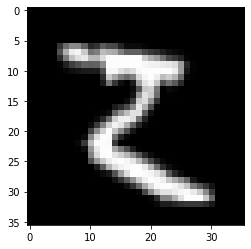

In [17]:
plt.imshow(x_train[0])

In [18]:
inp = tf.keras.Input(shape=(36, 36,3))
base_model = vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor = inp
)

58900480/58889256 [==============================] - 1s 0us/step


In [19]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 36, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 36, 36, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 36, 36, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 18, 18, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 18, 18, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 18, 18, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 9, 9, 128)         0     

In [20]:
nL = len(base_model.layers)
print(nL)

19


In [22]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(112, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)

In [23]:
model = Model(inputs = base_model.input, outputs = output)

In [24]:
for layer in base_model.layers[:nL - 1]:
    layer.trainable = False

In [25]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 36, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 36, 36, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 36, 36, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 18, 18, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 18, 18, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 18, 18, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 9, 9, 128)         0     

In [27]:
batch_size = 256
epochs = 20

In [28]:
history = model.fit(x_train.numpy(), y_train, batch_size = batch_size, epochs=epochs,
                    verbose=1, validation_data = (x_test.numpy(), y_test))

Epoch 1/5
235/235 [==============================] - 34s 98ms/step - loss: 0.4811 - accuracy: 0.8667 - val_loss: 0.1908 - val_accuracy: 0.9419
Epoch 2/5
235/235 [==============================] - 21s 91ms/step - loss: 0.1609 - accuracy: 0.9514 - val_loss: 0.1374 - val_accuracy: 0.9569
Epoch 3/5
235/235 [==============================] - 21s 91ms/step - loss: 0.1230 - accuracy: 0.9624 - val_loss: 0.1076 - val_accuracy: 0.9668
Epoch 4/5
235/235 [==============================] - 21s 91ms/step - loss: 0.1044 - accuracy: 0.9679 - val_loss: 0.1072 - val_accuracy: 0.9656
Epoch 5/5
235/235 [==============================] - 21s 91ms/step - loss: 0.0929 - accuracy: 0.9711 - val_loss: 0.1066 - val_accuracy: 0.9666


In [ ]:
history = history.history

In [ ]:
def one_plot(n, y_lb, loss_acc, val_loss_acc):
    plt.subplot(1, 2, n)
    if n == 1:
        lb, lb2 = 'loss', 'val_loss'
        yMin = 0
        yMax = 1.05 * max(max(loss_acc), max(val_loss_acc))
    else:
        lb, lb2 = 'acc', 'val_acc'
        yMin = min(min(loss_acc), min(val_loss_acc))
        yMax = 1.0
    plt.plot(loss_acc, color='r', label=lb, linestyle='--')
    plt.plot(val_loss_acc, color='g', label=lb2)
    plt.ylabel(y_lb)
    plt.xlabel('Эпоха')
    plt.ylim([0.95 * yMin, yMax])
    plt.legend()

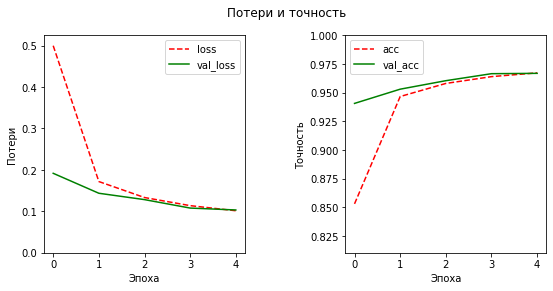

In [ ]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.5)
one_plot(1, 'Потери', history['loss'], history['val_loss'])
one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
plt.suptitle('Потери и точность')
plt.show()

In [ ]:
pred_1 = model.predict(x_train.numpy())
pred_1 = np.argmax(pred_1, axis=1)

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
y_train = np.argmax(y_train, axis=1)

In [ ]:
y_train[0]

5

In [ ]:
acc_1 = y_train[y_train == pred_1].shape[0] / y_train.shape[0]

In [ ]:
print(acc_1 * 100)

97.08333333333333


In [ ]:
pred_2 = model.predict(x_test.numpy())
pred_2 = np.argmax(pred_2, axis=1)

In [ ]:
acc_2 = y_test[y_test == pred_2].shape[0] / y_test.shape[0]


In [ ]:
print(acc_2 * 100)

96.69


In [ ]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [ ]:
print(y_train[:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [ ]:
y_test_classes = [0] * num_classes
y_test_true = [0] * num_classes
for i in range(y_test.shape[0]):
  y_test_classes[y_test[i]] += 1
  if y_test[i] == pred_2[i]:
    y_test_true[y_test[i]] += 1

In [ ]:
y_test_classes

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [ ]:
y_test_true

[962, 1126, 993, 984, 940, 817, 936, 1003, 941, 967]

In [ ]:
print("Test: \n")
for i in range(num_classes):
  print("acc ", i, " - ", (y_test_true[i] * 100) / y_test_classes[i] )

Test: 

acc  0  -  98.16326530612245
acc  1  -  99.20704845814979
acc  2  -  96.22093023255815
acc  3  -  97.42574257425743
acc  4  -  95.72301425661914
acc  5  -  91.59192825112108
acc  6  -  97.7035490605428
acc  7  -  97.56809338521401
acc  8  -  96.61190965092402
acc  9  -  95.8374628344896


In [ ]:
y_train_classes

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [ ]:
y_train_true

[5837, 6642, 5759, 5927, 5653, 5035, 5815, 6209, 5599, 5774]

In [ ]:
y_train_classes = [0] * num_classes
y_train_true = [0] * num_classes
for i in range(y_train.shape[0]):
  y_train_classes[y_train[i]] += 1
  if y_train[i] == pred_1[i]:
    y_train_true[y_train[i]] += 1

In [ ]:
print("Train: \n")
for i in range(num_classes):
  print("acc ", i, " - ", (y_train_true[i] * 100) / y_train_classes[i] )

Train: 

acc  0  -  98.54803309133885
acc  1  -  98.51676060516168
acc  2  -  96.65995300436389
acc  3  -  96.67264720274018
acc  4  -  96.7648065730914
acc  5  -  92.8795425198303
acc  6  -  98.25954714430551
acc  7  -  99.10614525139665
acc  8  -  95.69304392411554
acc  9  -  97.05832913094638
